In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()


In [3]:
df=pd.read_csv('Tokyo2021.csv')
df.head()



,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [4]:
df.shape

(93, 9)

In [5]:
df.describe()

,Rank,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [6]:
df.isnull().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
Continent        0
dtype: int64

<AxesSubplot:>

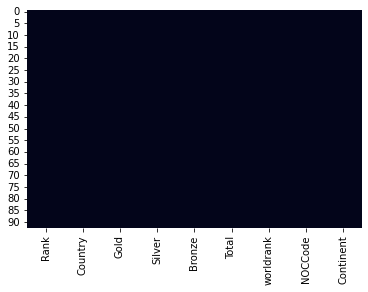

In [70]:
sns.heatmap(df.isnull(), cbar=False)




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold Medal     93 non-null     int64 
 3   Silver Medal   93 non-null     int64 
 4   Bronze Medal   93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
 7   NOCCode        93 non-null     object
 8   Continent      93 non-null     object
dtypes: int64(6), object(3)
memory usage: 6.7+ KB


In [8]:
df.duplicated().sum()


0

In [9]:
df.columns

Index(['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode', 'Continent'],
      dtype='object')

In [10]:
df.rename(columns={'Team/NOC':'Country','Gold Medal':'Gold',
                   'Silver Medal':'Silver',
                   'Bronze Medal':'Bronze','Rank by Total':'worldrank'},inplace=True)
df.head()

,Rank,Country,Gold,Silver,Bronze,Total,worldrank,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [11]:
df.columns

Index(['Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Total', 'worldrank',
       'NOCCode', 'Continent'],
      dtype='object')

### Finding Top 10 Countries according to World ranking in Tokyo olympic

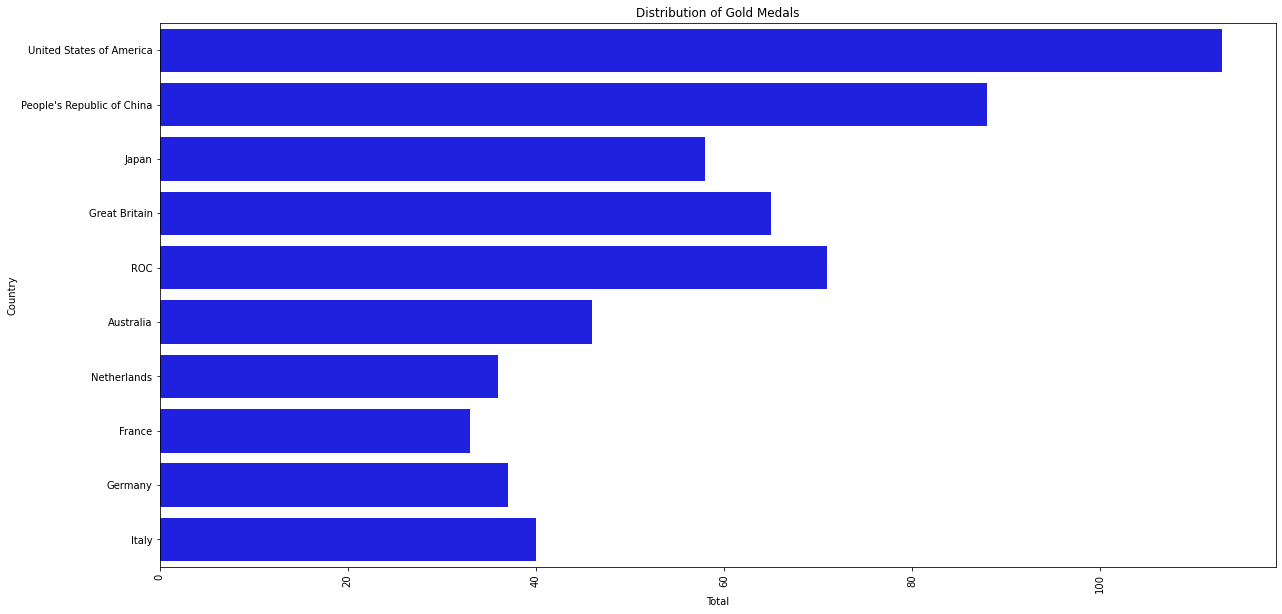

In [20]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Total',y='Country',color='blue',data=df[:10])
plt.title('Distribution of Gold Medals')
plt.xticks(rotation=90)
plt.show()

USA has topped in the list With total of 113 Medals in Tokyo olympic.

### Arrange the countries according to higest Gold,Sliver,Bronze medals win

<AxesSubplot:xlabel='Gold', ylabel='Country'>

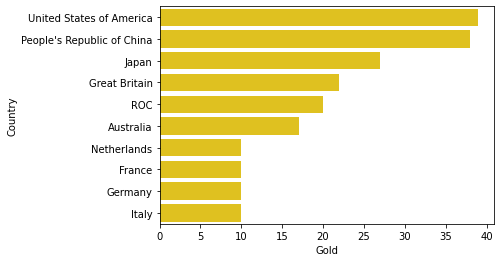

In [55]:
sns.barplot(x=df['Gold'][:10],y=df['Country'][:10],color='gold')


<AxesSubplot:xlabel='Silver', ylabel='Country'>

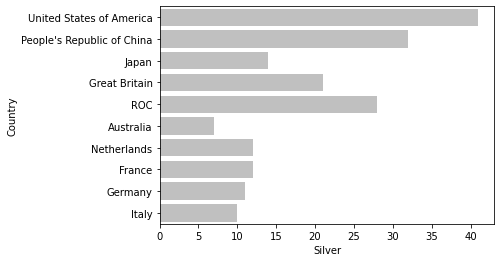

In [54]:
sns.barplot(x=df['Silver'][:10],y=df['Country'][:10],color='silver')

<AxesSubplot:xlabel='Bronze', ylabel='Country'>

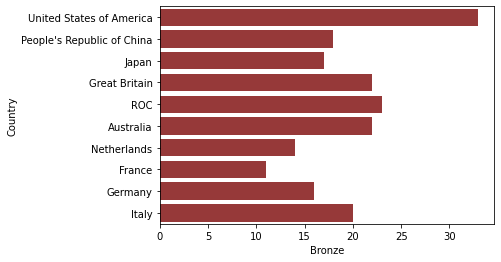

In [58]:
sns.barplot(x=df['Bronze'][:10],y=df['Country'][:10],color='   Brown')

### Find the Gold,Silver,Bronze Medals Won by India & Also finds its Ranking

In [62]:
df.loc[df['Country']=='India']


,Rank,Country,Gold,Silver,Bronze,Total,worldrank,NOCCode,Continent
47,48,India,1,2,4,7,33,IND,Asia


### Comparing India's medal counts with others



C:\Users\Admin\anaconda3\DLLs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "India's Gold vs others")

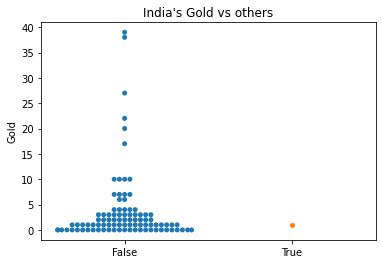

In [112]:
sns.swarmplot(df.Country.values=="India",df["Gold"])
plt.title("India's Gold vs others")

C:\Users\Admin\anaconda3\DLLs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "India's silver vs others")

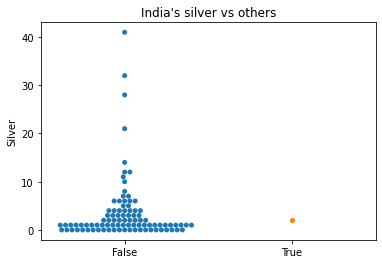

In [114]:
sns.swarmplot(df.Country.values=="India",df["Silver"])
plt.title("India's silver vs others")

In [ ]:
sns.swarmplot(df.Country.values=="India",df["Bronze"])
plt.title("India's bronze vs others")

### correlation using heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

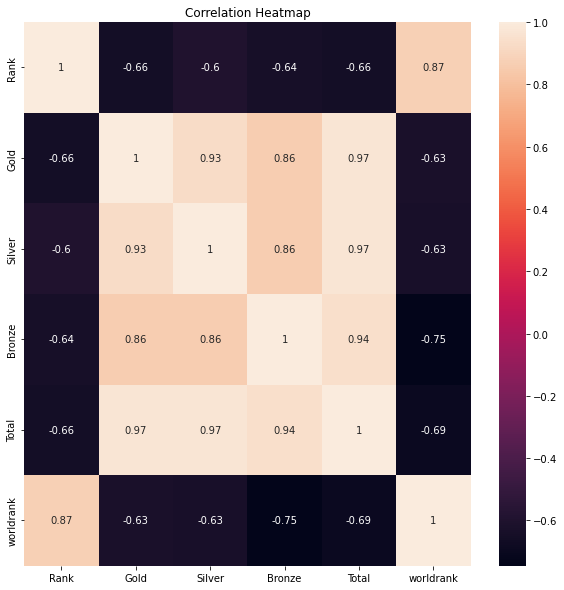

In [69]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

### number of country participate in tokyo olympic from different continents

<AxesSubplot:xlabel='Continent', ylabel='Country'>

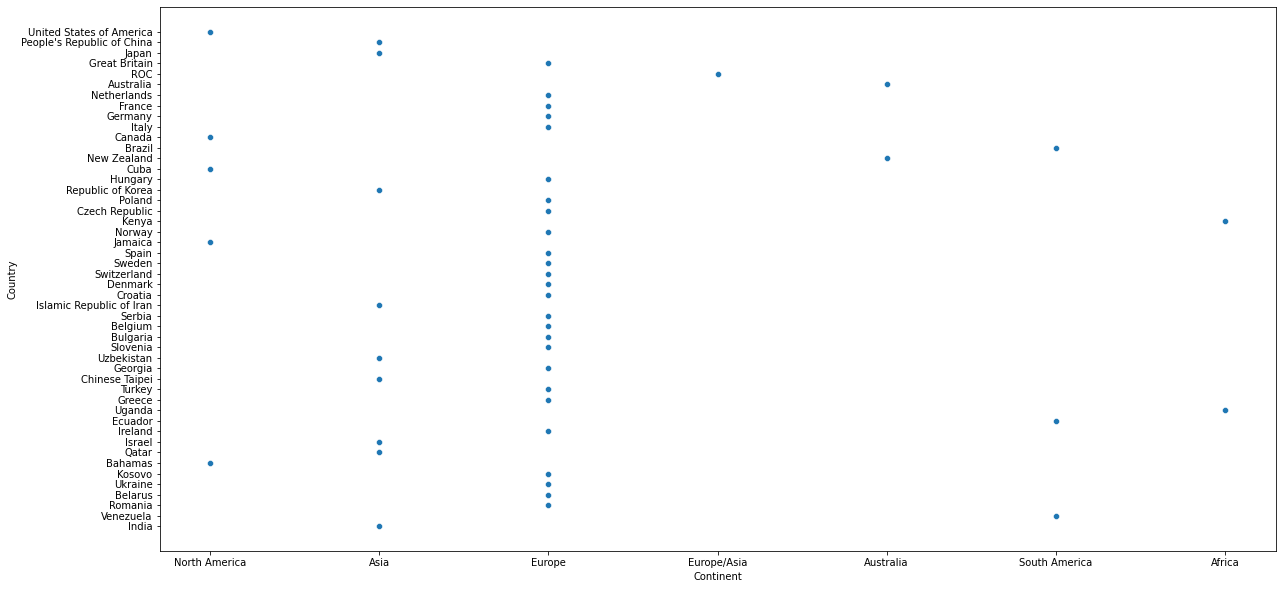

In [78]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Continent',y='Country',data=df[:48])

<AxesSubplot:xlabel='Continent', ylabel='Country'>

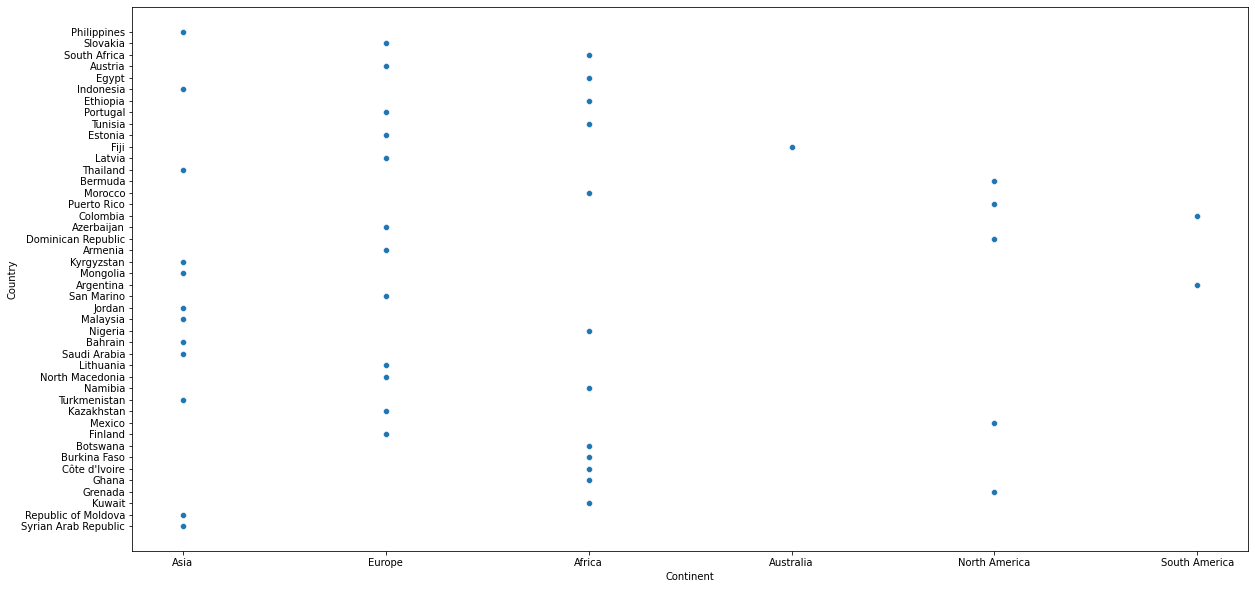

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Continent',y='Country',data=df[49:])

### piechart for continent 

In [81]:
df['Continent'].unique()

array(['North America', 'Asia', 'Europe', 'Europe/Asia', 'Australia',
       'South America', 'Africa'], dtype=object)

<AxesSubplot:ylabel='Continent'>

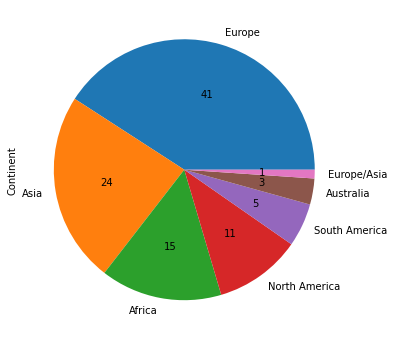

In [110]:
plt.figure(figsize=(50,6))
df.Continent.value_counts().plot.pie(fontsize=10,autopct='%.0f')


### pairplot 

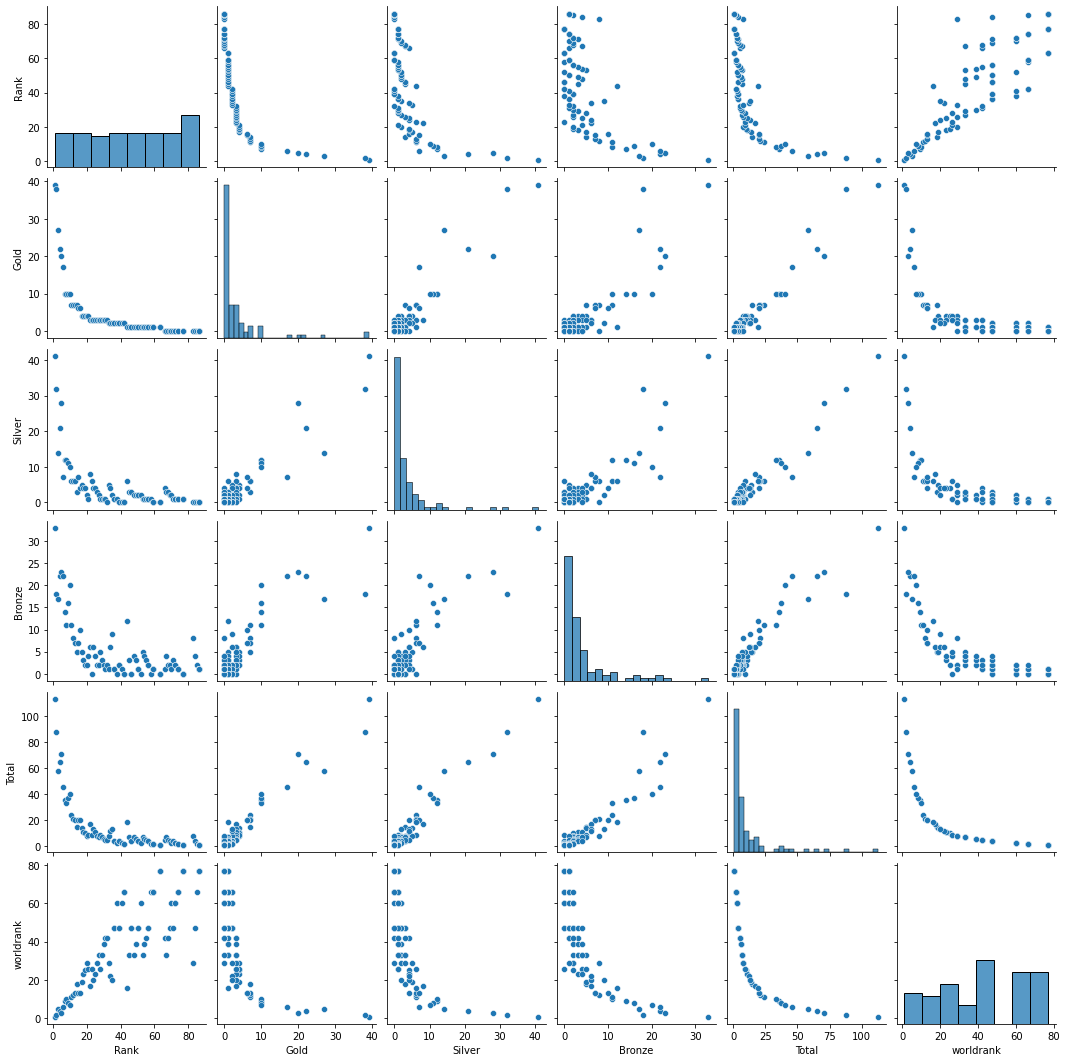

In [104]:
sns.pairplot(df)